## Import Libraries

In [50]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import pickle 
import json
 
import config

In [102]:
config.JSON_FILE_PATH

'artifacts/project_data.json'

In [103]:
config.LASSO_MODEL_FILE_PATH

'artifacts/lasso_model.pkl'

### Problem Statement

### Data Gathering

In [51]:
df = pd.read_csv("Job_Placement_Data.csv")
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [52]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [53]:
148/(148+67)

0.6883720930232559

In [54]:
67/(148 +67)

0.3116279069767442

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [56]:
df["gender"].value_counts().to_dict()

{'M': 139, 'F': 76}

In [57]:
df["gender"].replace({'M': 1, 'F': 0}, inplace= True)
df["gender"].value_counts()

1    139
0     76
Name: gender, dtype: int64

In [58]:
df["ssc_board"].value_counts().to_dict()

{'Central': 116, 'Others': 99}

In [59]:
df["ssc_board"].replace({'Central': 1, 'Others': 0},inplace = True)
df["ssc_board"].value_counts()

1    116
0     99
Name: ssc_board, dtype: int64

In [60]:
df["hsc_board"].value_counts().to_dict()

{'Others': 131, 'Central': 84}

In [61]:
df["hsc_board"].replace({'Others': 0, 'Central': 1},inplace = True)
df["hsc_board"].value_counts()

0    131
1     84
Name: hsc_board, dtype: int64

In [62]:
df["undergrad_degree"].value_counts().to_dict()

{'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11}

In [63]:
df = pd.get_dummies(df, columns = ["undergrad_degree"])

In [64]:
df["hsc_subject"].value_counts().to_dict()

{'Commerce': 113, 'Science': 91, 'Arts': 11}

In [65]:
df = pd.get_dummies(df, columns = ["hsc_subject"])

In [66]:
df["work_experience"].value_counts().to_dict()

{'No': 141, 'Yes': 74}

In [67]:
df["work_experience"].replace({'No': 0, 'Yes': 1}, inplace = True)
df["work_experience"].value_counts()

0    141
1     74
Name: work_experience, dtype: int64

In [68]:
df["specialisation"].value_counts().to_dict()

{'Mkt&Fin': 120, 'Mkt&HR': 95}

In [69]:
df["specialisation"].replace({'Mkt&Fin': 1, 'Mkt&HR': 0}, inplace = True)

In [70]:
df["status"].value_counts().to_dict()

{'Placed': 148, 'Not Placed': 67}

In [71]:
df["status"].replace({'Placed': 1, 'Not Placed': 0},inplace = True)
df["status"].value_counts()

1    148
0     67
Name: status, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      215 non-null    int64  
 1   ssc_percentage              215 non-null    float64
 2   ssc_board                   215 non-null    int64  
 3   hsc_percentage              215 non-null    float64
 4   hsc_board                   215 non-null    int64  
 5   degree_percentage           215 non-null    float64
 6   work_experience             215 non-null    int64  
 7   emp_test_percentage         215 non-null    float64
 8   specialisation              215 non-null    int64  
 9   mba_percent                 215 non-null    float64
 10  status                      215 non-null    int64  
 11  undergrad_degree_Comm&Mgmt  215 non-null    uint8  
 12  undergrad_degree_Others     215 non-null    uint8  
 13  undergrad_degree_Sci&Tech   215 non

In [73]:
df.isna().sum()

gender                        0
ssc_percentage                0
ssc_board                     0
hsc_percentage                0
hsc_board                     0
degree_percentage             0
work_experience               0
emp_test_percentage           0
specialisation                0
mba_percent                   0
status                        0
undergrad_degree_Comm&Mgmt    0
undergrad_degree_Others       0
undergrad_degree_Sci&Tech     0
hsc_subject_Arts              0
hsc_subject_Commerce          0
hsc_subject_Science           0
dtype: int64

In [74]:
x = df.drop("status",axis = 1)
y = df.status

In [75]:
random_oversamp = RandomOverSampler(sampling_strategy= 0.8, random_state= 3)
x_sampled,y_sampled = random_oversamp.fit_resample(x,y)
y_sampled.value_counts()

1    148
0    118
Name: status, dtype: int64

In [76]:
148/(118+148)

0.556390977443609

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled, test_size= 0.3, stratify= y_sampled, random_state= 11)


### Model Evaluation

In [78]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

D:\Program Installation\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
log_reg.score(x_train,y_train)

0.8870967741935484

In [80]:
log_reg.score(x_test,y_test)

0.8625

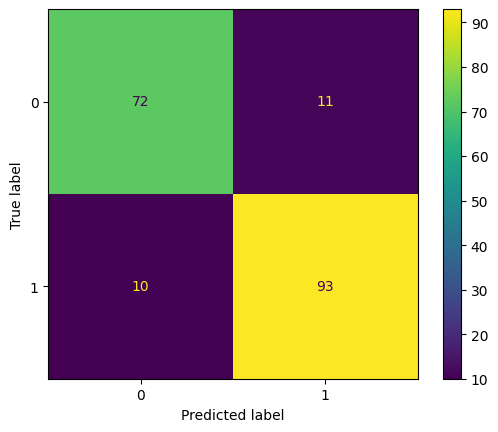

In [81]:
ConfusionMatrixDisplay.from_estimator(log_reg, x_train,y_train)

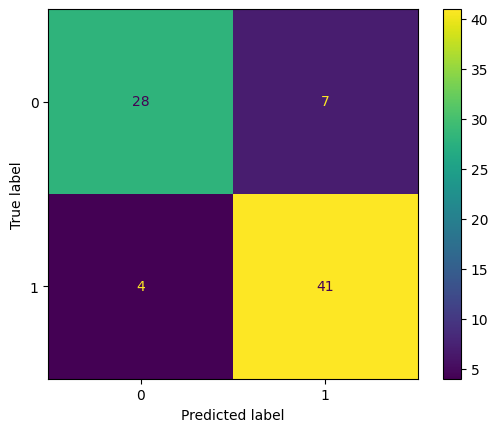

In [82]:
ConfusionMatrixDisplay.from_estimator(log_reg, x_test,y_test)

### Training Data evaluation

In [83]:
y_pred_train = log_reg.predict(x_train)

cnf_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_mat)
print("*"*50)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
print("*"*50)

precision = precision_score(y_train, y_pred_train)
print("Precision Score :",precision)
print("*"*50)

recall = recall_score(y_train,y_pred_train)
print("Recall score :",recall)
print("*"*50)

f1 = f1_score(y_train, y_pred_train)
print("F1 Score ", f1)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report :\n",clf_report)

Confusion Matrix :
 [[72 11]
 [10 93]]
**************************************************
Accuracy :  0.8870967741935484
**************************************************
Precision Score : 0.8942307692307693
**************************************************
Recall score : 0.9029126213592233
**************************************************
F1 Score  0.8985507246376813
**************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        83
           1       0.89      0.90      0.90       103

    accuracy                           0.89       186
   macro avg       0.89      0.89      0.89       186
weighted avg       0.89      0.89      0.89       186



### Test data Evaluation 

In [84]:
y_pred = log_reg.predict(x_test)

cnf_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_mat)
print("*"*50)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is :",accuracy)
print("*"*50)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*50)

precision_val = precision_score(y_test,y_pred)
print("Prescision :",precision_val)

recall_val = recall_score(y_test,y_pred)
print("Recall :",recall_val)

f1_val = f1_score(y_test,y_pred)
print("F1 SCore : ",f1_val)

Confusion Matrix :
 [[28  7]
 [ 4 41]]
**************************************************
Accuracy is : 0.8625
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.85      0.91      0.88        45

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80

**************************************************
Prescision : 0.8541666666666666
Recall : 0.9111111111111111
F1 SCore :  0.8817204301075269


### AUC ROC Curve

In [85]:
y_pred_train = log_reg.predict(x_train)
y_pred_train_prob = log_reg.predict_proba(x_train)
y_pred_train_prob_class1 = y_pred_train_prob[:,1]

In [86]:
fpr,tpr,threshold = roc_curve(y_train,y_pred_train_prob_class1)

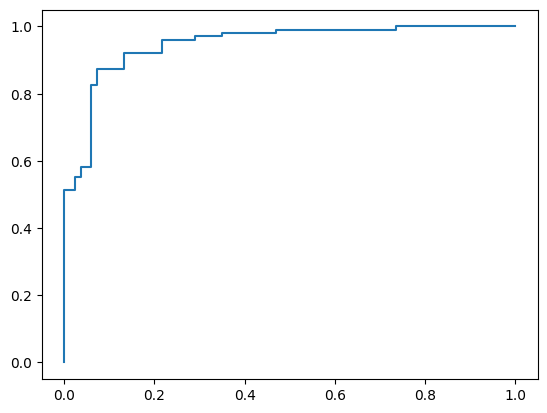

In [87]:
plt.plot(fpr,tpr)


### Regulation 

In [88]:
ridge_model = RidgeClassifier(alpha = 0.067)
ridge_model.fit(x_train,y_train)


RidgeClassifier(alpha=0.067)

In [89]:
y_pred = ridge_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_train, y_pred)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_train, y_pred)
print("Precision :",precision_value)

recall_value = recall_score(y_train, y_pred)
print('Recall :',recall_value)

f1_value = f1_score(y_train, y_pred)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[73 10]
 [ 6 97]]
**************************************************
Accuracy is : 0.9139784946236559
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        83
           1       0.91      0.94      0.92       103

    accuracy                           0.91       186
   macro avg       0.92      0.91      0.91       186
weighted avg       0.91      0.91      0.91       186

**************************************************
Precision : 0.9065420560747663
Recall : 0.941747572815534
F1 Score: 0.9238095238095239
**************************************************


In [90]:
y_pred_test = ridge_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_test, y_pred_test)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_test, y_pred_test)
print("Precision :",precision_value)

recall_value = recall_score(y_test, y_pred_test)
print('Recall :',recall_value)

f1_value = f1_score(y_test, y_pred_test)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[32  3]
 [ 8 37]]
**************************************************
Accuracy is : 0.8625
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.93      0.82      0.87        45

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80

**************************************************
Precision : 0.925
Recall : 0.8222222222222222
F1 Score: 0.8705882352941177
**************************************************


### L1 Regularization

In [91]:
log_reg_model = LogisticRegression(penalty='l1', solver='liblinear',C = 1.0)
log_reg_model.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [92]:
## Evaluation on Training Dataset

y_pred_train = log_reg_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_train, y_pred_train)
print("Precision :",precision_value)

recall_value = recall_score(y_train, y_pred_train)
print('Recall :',recall_value)

f1_value = f1_score(y_train, y_pred_train)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[71 12]
 [ 7 96]]
**************************************************
Accuracy is : 0.8978494623655914
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        83
           1       0.89      0.93      0.91       103

    accuracy                           0.90       186
   macro avg       0.90      0.89      0.90       186
weighted avg       0.90      0.90      0.90       186

**************************************************
Precision : 0.8888888888888888
Recall : 0.9320388349514563
F1 Score: 0.909952606635071
**************************************************


In [93]:
# Evaluation on Testing Dataset

y_pred = log_reg_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_test, y_pred)
print("Precision :",precision_value)

recall_value = recall_score(y_test, y_pred)
print('Recall :',recall_value)

f1_value = f1_score(y_test, y_pred)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[31  4]
 [ 4 41]]
**************************************************
Accuracy is : 0.9
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.91      0.91      0.91        45

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

**************************************************
Precision : 0.9111111111111111
Recall : 0.9111111111111111
F1 Score: 0.9111111111111111
**************************************************


### KNN Classifier

In [94]:
knn_clf = KNeighborsClassifier(n_neighbors= 5 , p = 2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [95]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[71 12]
 [12 91]]
Accuracy : 0.8709677419354839
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        83
           1       0.88      0.88      0.88       103

    accuracy                           0.87       186
   macro avg       0.87      0.87      0.87       186
weighted avg       0.87      0.87      0.87       186



In [96]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[30  5]
 [ 9 36]]
Accuracy : 0.825
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.88      0.80      0.84        45

    accuracy                           0.82        80
   macro avg       0.82      0.83      0.82        80
weighted avg       0.83      0.82      0.83        80



### Save Required Data

#### 1. Model

In [97]:
# with open(r"artifacts/logistic_model.pkl", "wb") as f:
#     pickle.dump(log_reg,f)
    

In [98]:
# with open(r"artifacts/ridge_model.pkl", "wb") as f:
#     pickle.dump(ridge_model, f)

In [99]:
with open(r"artifacts/lasso_model.pkl","wb") as f:
    pickle.dump(log_reg_model,f)

In [100]:
# with open(r"artifacts/knn_reg_model.pkl","wb") as f:
#     pickle.dump(knn_clf,f)

### 2. Save Column Names

In [101]:
column_names = x.columns
project_data = {"Column Names" : column_names.to_list(),
               "Gender" : {'M': 1, 'F': 0},
               "SSC_Board":{'Central': 1, 'Others': 0},
               "HSC_Board" : {'Central': 1, 'Others': 0},
               "Work_experience" : {'No': 0, 'Yes': 1},
               "Specialisation" : {'Mkt&Fin': 1, 'Mkt&HR': 0}}
with open(r"artifacts/project_data.json", "w") as f:
    json.dump(project_data, f)